In [3]:
# Importando Bibliotecas e Carregando o Dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%pip install mplfinance==0.12.10b0
import mplfinance as mpf
import numpy as np

# Carregando o dataset 'tips'
tips = sns.load_dataset('tips')

  Using cached mplfinance-0.12.10b0-py3-none-any.whl.metadata (19 kB)
Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Número de Registros, Tipos de Dados
# Número de registros e tipos de dados
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 1 to 243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   total_bill  243 non-null    float64       
 1   tip         243 non-null    float64       
 2   sex         243 non-null    category      
 3   smoker      243 non-null    category      
 4   day         243 non-null    category      
 5   time        243 non-null    category      
 6   size        243 non-null    int64         
 7   date        243 non-null    datetime64[ns]
 8   open        243 non-null    float64       
 9   high        243 non-null    float64       
 10  low         243 non-null    float64       
 11  close       243 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(6), int64(1)
memory usage: 18.6 KB
None


In [11]:
# Resumos Estatísticos Numéricos, Contagem de Valores e Distribuição dos Dados
# Resumo estatístico numérico
print(tips.describe())

# Contagem de valores para variáveis categóricas
print(tips['sex'].value_counts())
print(tips['smoker'].value_counts())
print(tips['day'].value_counts())
print(tips['time'].value_counts())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [12]:
# Elaboração de Hipóteses e Confirmação/Refutação
'''
    Hipótese 1: O total da conta (total_bill) tem uma correlação positiva com a gorjeta (tip).
    Hipótese 2: A média de gorjetas dadas por homens é maior que a média de gorjetas dadas por mulheres.
    Hipótese 3: Clientes que fumam (smoker) dão gorjetas maiores que clientes que não fumam.
    Hipótese 4: As gorjetas são maiores aos fins de semana (sábado e domingo) do que nos dias de semana.
    Hipótese 5: O período do jantar (dinner) tem gorjetas maiores do que o período do almoço (lunch).
    Hipótese 6: Grupos maiores de clientes resultam em gorjetas maiores.

Vamos analisar cada uma dessas hipóteses com visualizações e cálculos estatísticos.
'''

'\n    Hipótese 1: O total da conta (total_bill) tem uma correlação positiva com a gorjeta (tip).\n    Hipótese 2: A média de gorjetas dadas por homens é maior que a média de gorjetas dadas por mulheres.\n    Hipótese 3: Clientes que fumam (smoker) dão gorjetas maiores que clientes que não fumam.\n    Hipótese 4: As gorjetas são maiores aos fins de semana (sábado e domingo) do que nos dias de semana.\n    Hipótese 5: O período do jantar (dinner) tem gorjetas maiores do que o período do almoço (lunch).\n    Hipótese 6: Grupos maiores de clientes resultam em gorjetas maiores.\n\nVamos analisar cada uma dessas hipóteses com visualizações e cálculos estatísticos.\n'

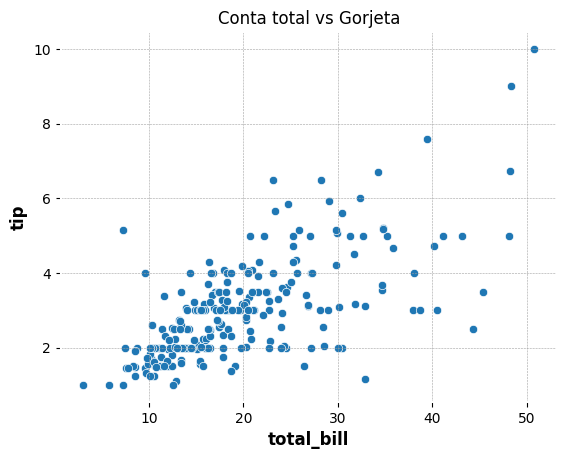

Correlação entre total_conta e gorjeta: 0.6769006771838099


In [36]:
# Gráficos e Análise das Hipóteses
# Hipótese 1: Correlação entre Total da Conta e Gorjeta
# Gráfico de dispersão
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Conta total vs Gorjeta')
plt.show()

# Cálculo da correlação
correlation = tips['total_bill'].corr(tips['tip'])
print(f"Correlação entre total_conta e gorjeta: {correlation}")

# conclusão:
# quanto maior o número da conta maior o valor dado da gorjeta
# e menor o número de gorjetas dadas pelo cliente

# então pode-se dizer que se o preço for razoavelmente baixo
# o cliente irá pagar a gorjeta

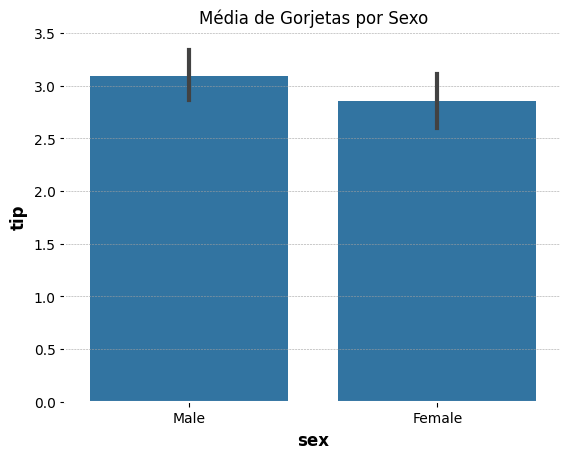

T-Stat: 1.2702665354843727, P-Value: 0.20521468528413134


In [43]:
# Hipótese 2: Média de gorjetas por sexo
# Gráfico de barras
sns.barplot(data=tips, x='sex', y='tip',
            estimator=lambda x: sum(x)/len(x))
plt.title('Média de Gorjetas por Sexo')
plt.show()

# Teste t para diferença de médias
male_tips = tips[tips['sex'] == 'Male']['tip']
female_tips = tips[tips['sex'] == 'Female']['tip']
t_stat, p_val = ttest_ind(male_tips, female_tips)
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

# conclusão:
# a diferença de gorjetas por sexo é minima
# então podemos dizer que:
# a gorjeta dada é independente do sexo do cliente

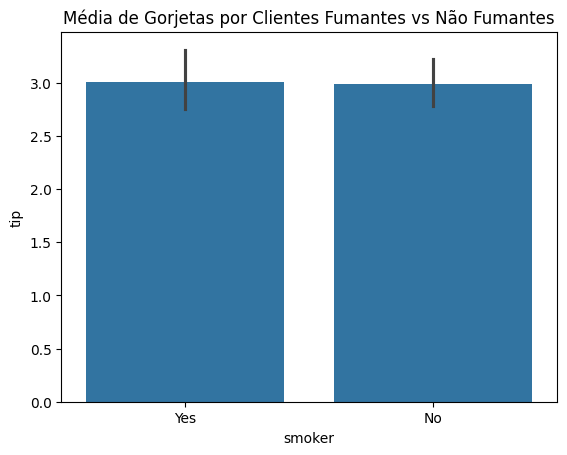

T-Stat: 0.09222805186888201, P-Value: 0.9265931522244976


In [15]:
# Hipótese 3: Gorjetas por clientes que fumam vs. não fumam
# Gráfico de barras
sns.barplot(data=tips, x='smoker', y='tip',
            estimator=lambda x: sum(x)/len(x))
plt.title('Média de Gorjetas por Clientes Fumantes vs Não Fumantes')
plt.show()

# Teste t para diferença de médias
smoker_tips = tips[tips['smoker'] == 'Yes']['tip']
non_smoker_tips = tips[tips['smoker'] == 'No']['tip']
t_stat, p_val = ttest_ind(smoker_tips, non_smoker_tips)
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

# Conclusão
# assim como a questão do sexo, a diferença é quase nula
# portanto a gorjeta também é independente de fumar ou não

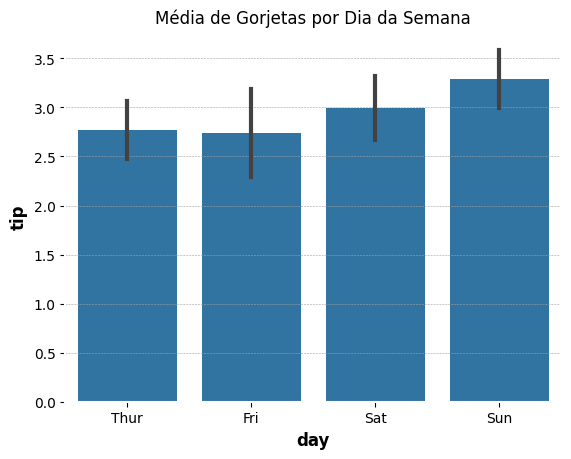

T-Stat: 1.956451000037696, P-Value: 0.051566999811069526


In [44]:
# Hipótese 4: Gorjetas por dia da semana
# Gráfico de barras
sns.barplot(data=tips, x='day', y='tip',
            estimator=lambda x: sum(x)/len(x))
plt.title('Média de Gorjetas por Dia da Semana')
plt.show()

# Comparação específica para fins de semana vs dias de semana
weekend_tips = tips[tips['day'].isin(['Sat', 'Sun'])]['tip']
weekday_tips = tips[~tips['day'].isin(['Sat', 'Sun'])]['tip']
t_stat, p_val = ttest_ind(weekend_tips, weekday_tips)
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

# Conclusão:
# Sábado e Domingo a gorjeta é levemente maior que na semana
# é possível que:
# os clientes estejam com mais dinheiro no final de semana
# se sentem mais a vontade em gastar no final de semana

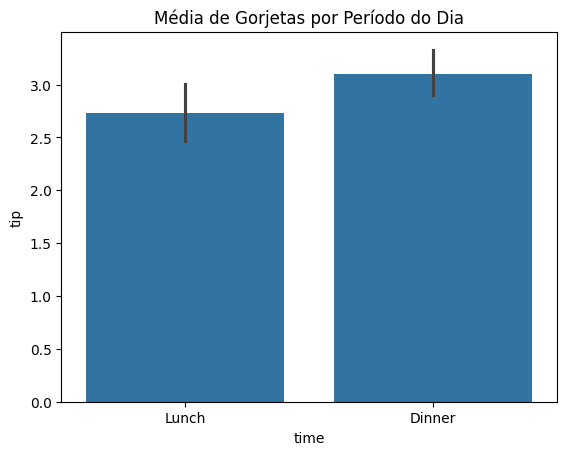

T-Stat: 1.9062569301202392, P-Value: 0.05780153475171558


In [17]:
# Hipótese 5: Gorjetas por período do dia
# Gráfico de barras
sns.barplot(data=tips, x='time', y='tip',
            estimator=lambda x: sum(x)/len(x))
plt.title('Média de Gorjetas por Período do Dia')
plt.show()

# Teste t para diferença de médias
dinner_tips = tips[tips['time'] == 'Dinner']['tip']
lunch_tips = tips[tips['time'] == 'Lunch']['tip']
t_stat, p_val = ttest_ind(dinner_tips, lunch_tips)
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

# Conclusão:
# os clientes dão mais gorjetas em quantidade durante:
# jantar > almoço (por uma diferença bem baixa)
# portanto, os clientes preferem pagar pelas gorjetas no fim do dia

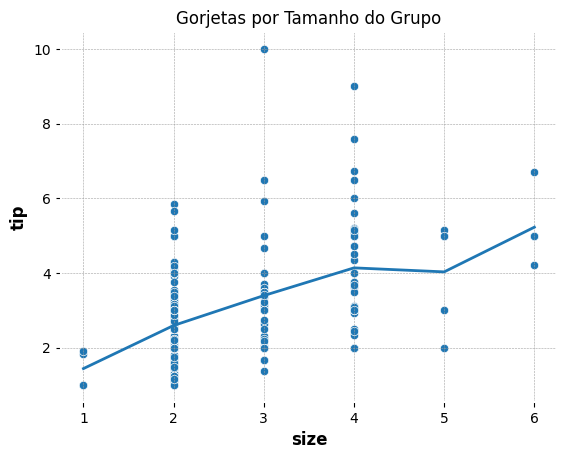

size
1    1.437500
2    2.592452
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


In [37]:
# Hipótese 6: Gorjetas por tamanho do grupo
# Gráfico de dispersão com linha de tendência
sns.scatterplot(data=tips, x='size', y='tip')
sns.lineplot(data=tips, x='size',
             y='tip', errorbar=None)
plt.title('Gorjetas por Tamanho do Grupo')
plt.show()

# Análise estatística
grouped_tips = tips.groupby('size')['tip'].mean()
print(grouped_tips)

# Conclusão:
# A média de gorjetas é maior com um grupo de 2 a 4 pessoas
# e um valor semelhante em todos os outros tamanhos (1, 5, 6)
# Supostamente, os clientes preferem:
# pagar mais gorjetas com um grupo pequeno de pessoas
# em relação ao preço:
# preferem pagar o valor de acordo com o do pedido, crescentemente.

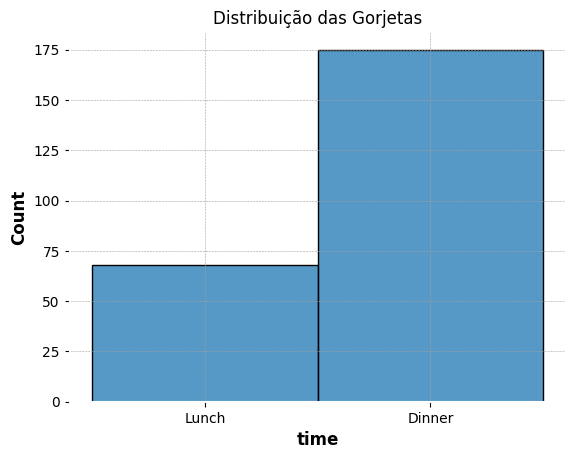

In [59]:
# Gráficos de Distribuição

# Histograma para gorjeta
sns.histplot(tips['time'])
plt.title('Distribuição das Gorjetas')
plt.show()

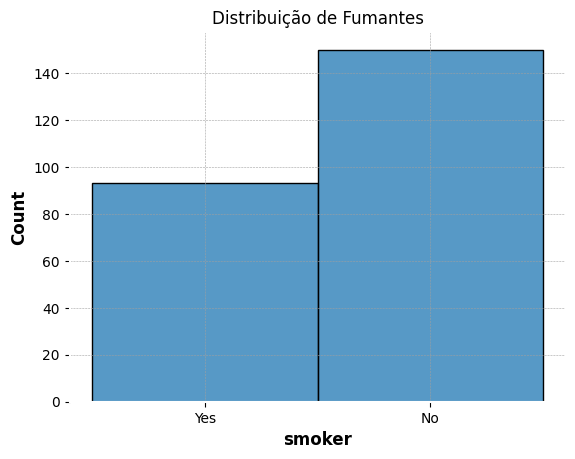

In [60]:
# Histograma para Fumantes
sns.histplot(tips['smoker'])
plt.title('Distribuição de Fumantes')
plt.show()

In [32]:
# Adicionando Gráficos de Velas e de Séries Temporais
# Criando uma série temporal sintética de gorjetas
# valores ficticeos para a linha de tempo
np.random.seed(0)
dates = pd.date_range(start='2021-01-01',
                      periods=len(tips), freq='D')
tips['date'] = dates
tips = tips.sort_values('date')

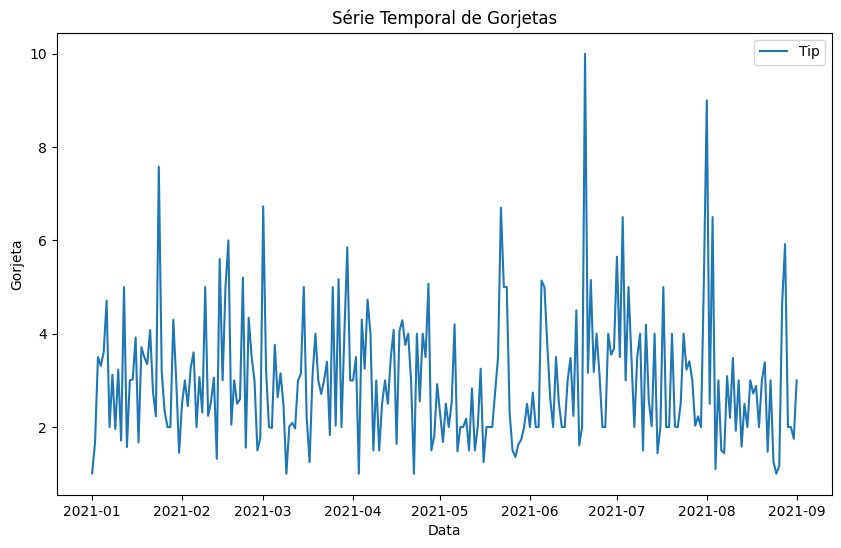

In [33]:
# Gráfico de Série Temporal para Gorjetas
plt.figure(figsize=(10, 6))
plt.plot(tips['date'], tips['tip'], label='Tip')
plt.title('Série Temporal de Gorjetas')
plt.xlabel('Data')
plt.ylabel('Gorjeta')
plt.legend()
plt.show()

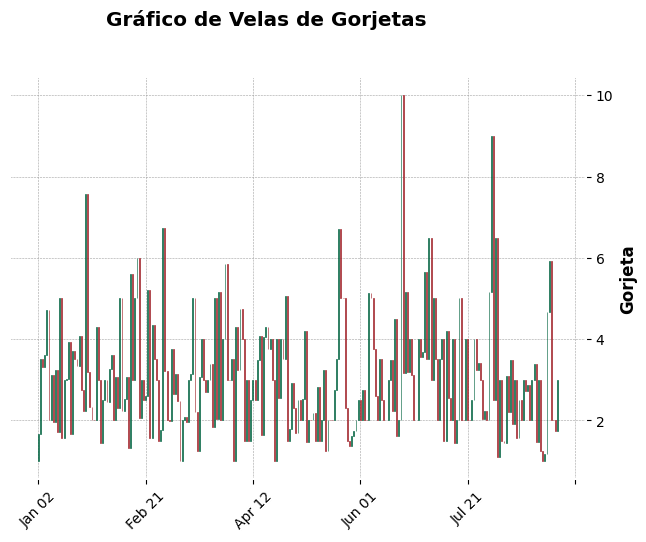

In [34]:
# Gráfico de Velas para Gorjetas
# Preparar dados para o gráfico de velas
tips['open'] = tips['tip'].shift(1)
tips['high'] = tips[['tip', 'open']].max(axis=1)
tips['low'] = tips[['tip', 'open']].min(axis=1)
tips['close'] = tips['tip']
# Remover NaN resultante do shift
tips = tips.dropna()
# Dados para o gráfico de velas
candle_data = tips[['date', 'open', 'high', 'low', 'close']].set_index('date')
# Plotando gráfico de velas
mpf.plot(candle_data, type='candle', style='charles',
         title='Gráfico de Velas de Gorjetas', ylabel='Gorjeta')